In [16]:
## import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import date, timedelta
import matplotlib.gridspec as gridspec
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [17]:
last_day = date(2020,5,8)
first_day = date(2020,2,25)

In [18]:
## import data

df_cov = pd.read_csv('/content/drive/My Drive/covid_de.csv')
demographics = pd.read_csv('/content/drive/My Drive/demographics_de.csv')

In [19]:
population = demographics[['state','population']].groupby('state').sum()

In [20]:
df = pd.read_csv('https://funkeinteraktiv.b-cdn.net/history.v4.csv')

df_ger = df[(df.label=='Deutschland')&(df.date>=int(first_day.strftime('%Y%m%d')))&(df.date<=int(last_day.strftime('%Y%m%d')))][
    ['label', 'date', 'confirmed', 'deaths', 'recovered']]
df_states = df[(df.label_parent=='Deutschland')&(df.date>=int(first_day.strftime('%Y%m%d')))&(df.date<=int(last_day.strftime('%Y%m%d')))][
    ['label', 'date', 'confirmed', 'deaths', 'recovered']]

In [21]:
df_ger['active'] = df_ger['confirmed'] - df_ger['recovered']

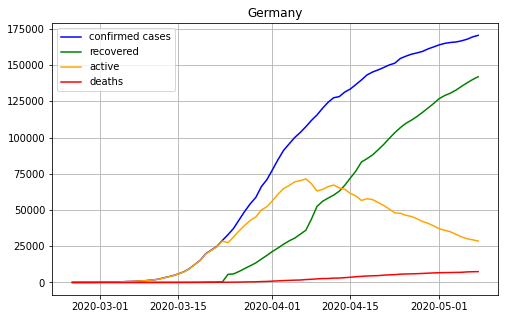

In [23]:
plt.figure(figsize=(8,5))
datelist = pd.date_range(end = last_day, periods = df_ger.shape[0]).tolist()
plt.plot(datelist, df_ger.confirmed, label='confirmed cases', color='b')
plt.plot(datelist, df_ger.recovered, label='recovered', color='g')
plt.plot(datelist, df_ger.active, label='active', color='orange')
plt.plot(datelist, df_ger.deaths, label='deaths', color='r')

plt.legend()
plt.title("Germany")
plt.grid()
plt.show()

In [8]:
states = df_states.label.unique()

df_states['confirmed_delta'] = ""
df_states['deaths_delta'] = ""

for s in states:
    df_states.loc[df_states.label==s, 'confirmed_delta'] = df_states.loc[df_states.label==s, 'confirmed'] \
            - np.append([0], df_states.loc[df_states.label==s,'confirmed'].values[:-1])
    df_states.loc[df_states.label==s, 'deaths_delta'] = df_states.loc[df_states.label==s, 'deaths'] \
            - np.append([0], df_states.loc[df_states.label==s,'deaths'].values[:-1])

In [9]:
temp = []
temp_d = []
for s in states[:-1]:
    c = df_states.loc[(df_states.date==20200413)&(df_states.label==s), 'confirmed'].values[0]
    d = df_states.loc[(df_states.date==20200413)&(df_states.label==s), 'deaths'].values[0]
    
    if s=='Baden-Württemberg':
        p = population.loc['Baden-Wuerttemberg'].values[0]
    elif s=='Thüringen':
        p = population.loc['Thueringen'].values[0]
    else:
        p = population.loc[s].values[0]
        
    temp.append(c*100000/p)
    temp_d.append(d*100000/p)

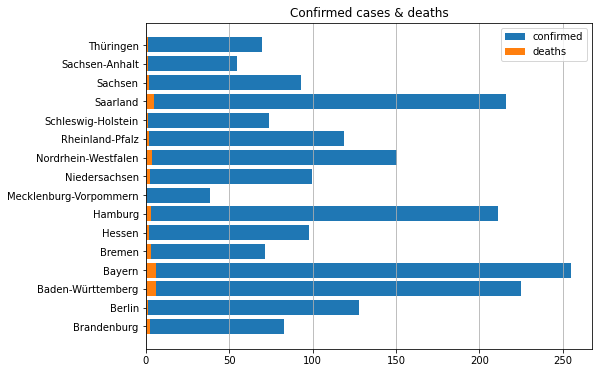

In [10]:
plt.figure(figsize=(8,6))
plt.grid(axis='x')
plt.title("Confirmed cases & deaths")
plt.barh(states[:-1], temp, label='confirmed')
plt.barh(states[:-1], temp_d, label='deaths')
plt.legend()

In [11]:
df_ger = df_cov[['county', 'age_group', 'gender', 'date', 'cases', 'deaths', 'recovered']].groupby(['gender', 'age_group']).sum()
df_ger = df_ger.reset_index()

demo_ger = demographics[['gender', 'age_group', 'population']].groupby(['gender', 'age_group']).sum()
demo_ger = demo_ger.reset_index()

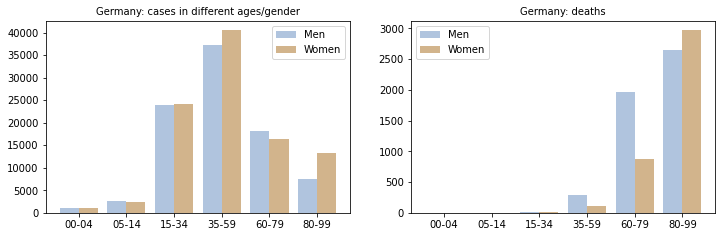

In [13]:
x = np.arange(6)
ages = df_ger.age_group.unique()
width=0.4
color1 = 'lightsteelblue'
color2 = 'tan'
legend_fontsize = 10
title_fontsize = 10
tick_fontsize = 10

fig = plt.figure(figsize=(12, 12))
gs = gridspec.GridSpec(3, 2)
ax = fig.add_subplot(gs[0, 0])
ax.bar(x - width/2, df_ger[df_ger.gender=="M"].cases, width, label='Men', color=color1)
ax.bar(x + width/2, df_ger[df_ger.gender=="F"].cases, width, label='Women', color=color2)
ax.set_title("Germany: cases in different ages/gender", fontsize=title_fontsize)
ax.set_xticks(x)
ax.set_xticklabels(ages)
ax.tick_params(axis='x', labelsize=tick_fontsize)
ax.tick_params(axis='y', labelsize=tick_fontsize)
ax.legend(fontsize=legend_fontsize)



ax = fig.add_subplot(gs[0, 1])
ax.bar(x - width/2, df_ger[df_ger.gender=="M"].deaths, width, label='Men', color=color1)
ax.bar(x + width/2, df_ger[df_ger.gender=="F"].deaths, width, label='Women', color=color2)
ax.set_title("Germany: deaths", fontsize=title_fontsize)
ax.set_xticks(x)
ax.set_xticklabels(ages)
ax.tick_params(axis='x', labelsize=tick_fontsize)
ax.tick_params(axis='y', labelsize=tick_fontsize)
ax.legend(fontsize=legend_fontsize)

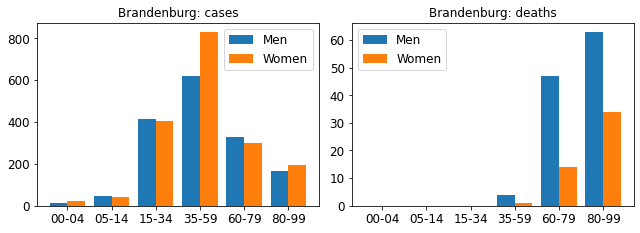

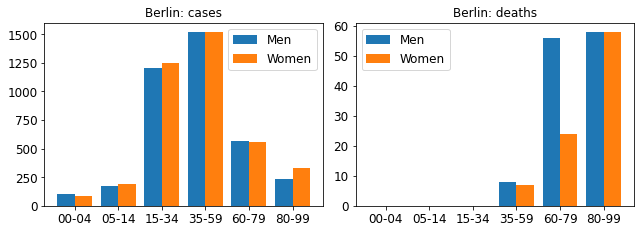

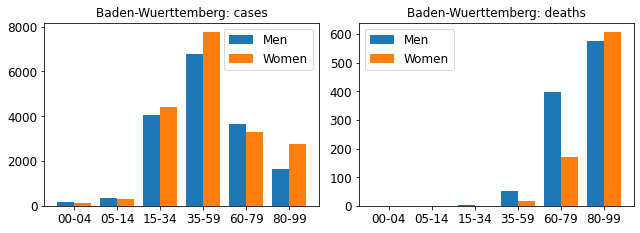

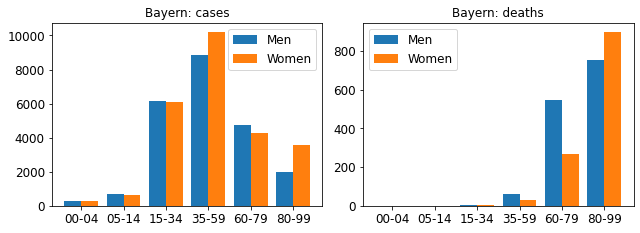

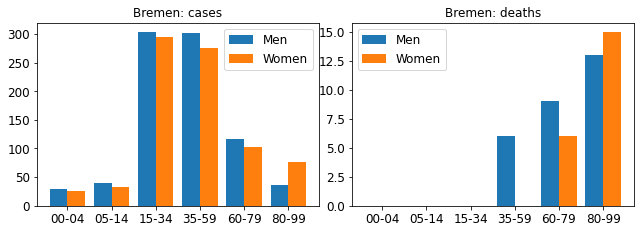

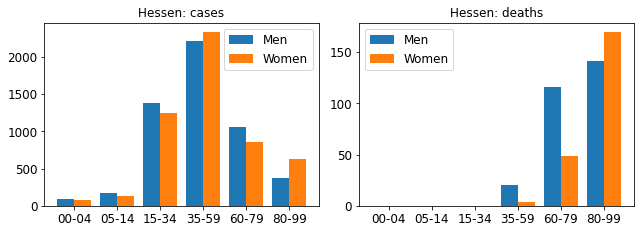

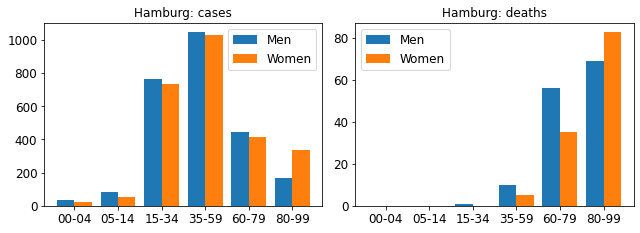

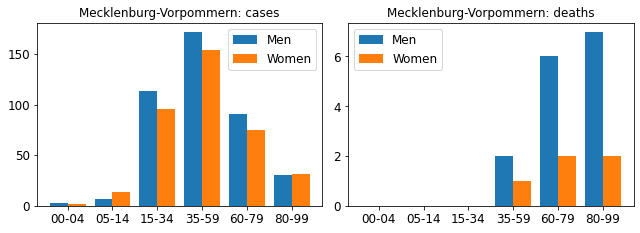

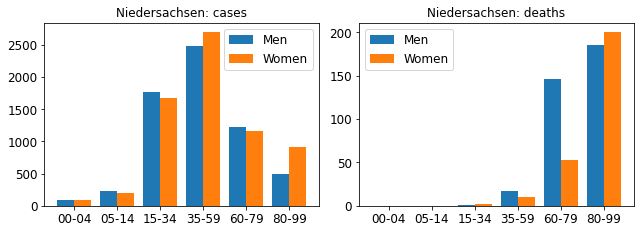

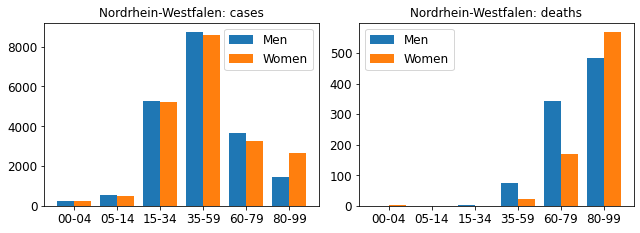

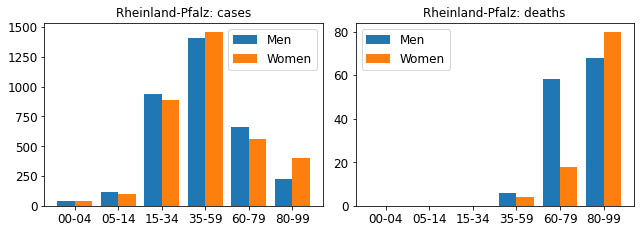

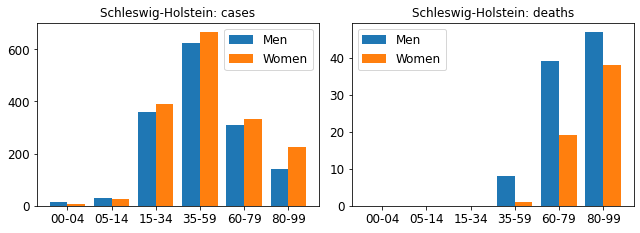

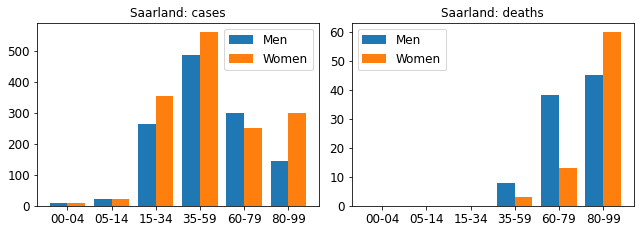

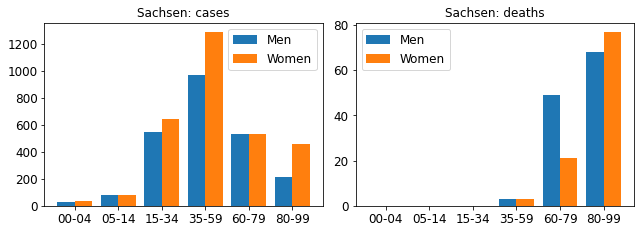

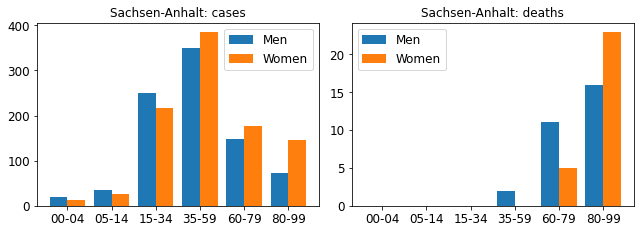

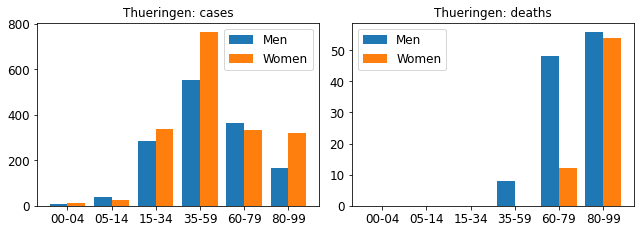

In [ ]:
color1 = 'lightsteelblue'
color2 = 'tan'
legend_fontsize = 12
title_fontsize = 12
tick_fontsize = 12

for s in states[:-1]:
    if (s=="Baden-Württemberg"):
        s = "Baden-Wuerttemberg"
    if(s=="Thüringen"):
        s = "Thueringen"
    t = df_cov[df_cov.state==s][['gender', 'age_group', 'cases', 'deaths']].groupby(['gender', 'age_group']).sum()
    t = t.reset_index()
    x = np.arange(6)
    ages = t.age_group.unique()
    width=0.4

    fig = plt.figure(figsize=(9, 9))
    
    
    ax = fig.add_subplot(gs[0, 0])
    ax.bar(x - width/2, t[t.gender=="M"].cases, width, label='Men')
    ax.bar(x + width/2, t[t.gender=="F"].cases, width, label='Women')
    ax.set_title(s + ": cases", fontsize=title_fontsize)
    ax.set_xticks(x)
    ax.set_xticklabels(ages)
    ax.legend(fontsize=legend_fontsize)
    ax.tick_params(axis='x', labelsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    
    ax = fig.add_subplot(gs[0, 1])
    ax.bar(x - width/2, t[t.gender=="M"].deaths, width, label='Men')
    ax.bar(x + width/2, t[t.gender=="F"].deaths, width, label='Women')
    ax.set_title(s + ": deaths", fontsize=title_fontsize)
    ax.set_xticks(x)
    ax.set_xticklabels(ages)
    ax.legend(fontsize=legend_fontsize)
    ax.tick_params(axis='x', labelsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    plt.tight_layout()  
    plt.show()